# Perceptrón

In [1]:
library(ggplot2)
library(tidyverse)

Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'tibble'"
Warning message:
"replacing previous import 'lifecycle::last_warnings' by 'rlang::last_warnings' when loading 'hms'"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.0     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
hardlim<-function(x){
    y<-ifelse(x>=0,1,0)
    return (y)
}

neurona<-function(X,w,b){
    salida<-hardlim(crossprod(X,w)+b)
    
}    

test_perceptron<-function(X,w,b){
 yp<-numeric(dim(X)[1])
    for(i in 1:(dim(X)[1]))
        yp[i]<-neurona(X[i,],w,b)
    return(yp)
    
}

train_perceptron <- function(X,y){

w = c(1.0,-0.8)
b = 0
    
  yp <-  test_perceptron(X,w,b)
    
    while(!identical(yp,y)){
      
        yp <-  test_perceptron(X,w,b)
        #
        if(!identical(yp,y)){
        yp_s <- yp[((y-yp) != 0)]
        y_s <- y[((y-yp) != 0)]
        X_s <- X[((y-yp) != 0),]
        
        w <- w + (y_s[1] - yp_s[1]) * X_s[1]
        b <- b + (y_s[1] - yp_s[1])
        }
    }
    
    return(c(w,b,yp))
    

}

## Ejemplo 1

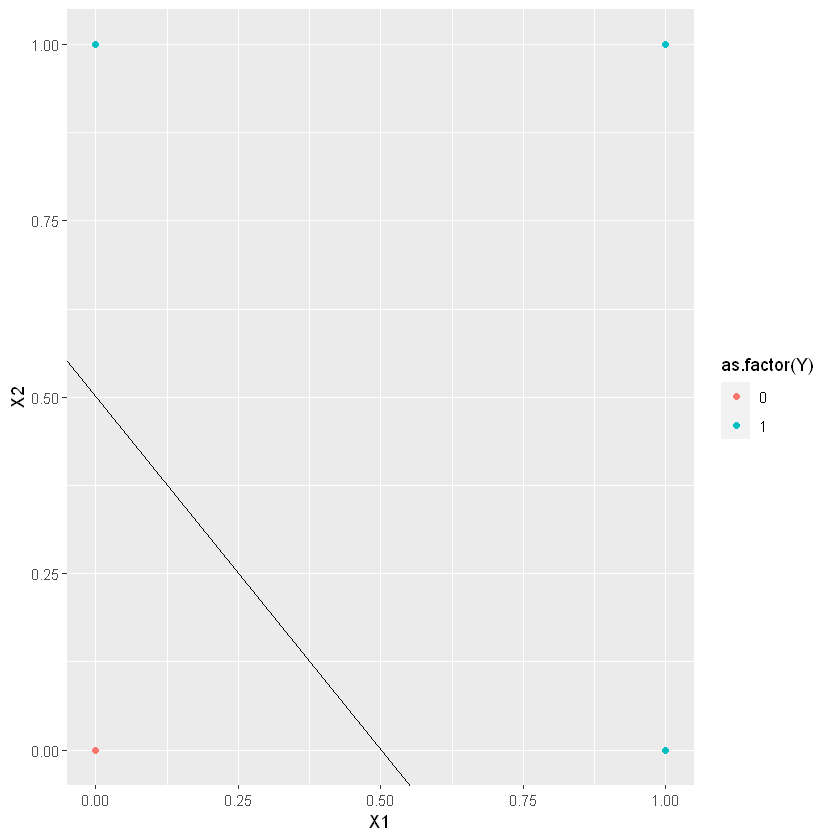

In [4]:

#definición de or

X<-cbind(c(0,0,1,1),c(0,1,0,1))
Y<-c(0,1,1,1)

datos<-data.frame(X,Y)

ggplot(datos,aes(x=X1, y=X2,color=as.factor(Y)))+
    geom_point()+geom_abline(intercept=(-(-0.25/0.5)),slope=(-(0.5/0.5)))

## Ejemplo 2

Warning message in (Y[1] - yp) * X[1, ]:
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in (Y[2] - yp) * X[2, ]:
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
"
Warning message in (Y[3] - yp) * X[3, ]:
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead.
"


[1] 1 0 0

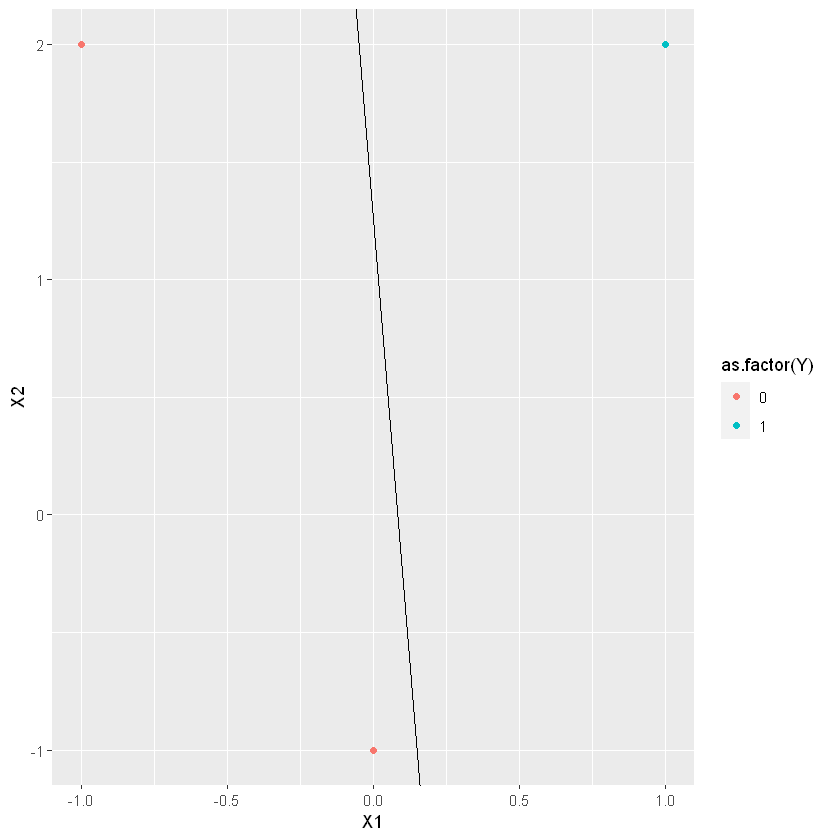

In [27]:
X<-cbind(c(1,-1,0),c(2,2,-1))
Y<-c(1,0,0)
datos<-data.frame(X,Y)


w<-c(1,-0.8)

#for(i in 1:(dim(X)[1]))
#yp<-neurona(X[i,],w,0)

yp<-neurona(X[1,],w,0)
#yp

#aplicar regla de aprendizaje
w<-w+(Y[1]-yp)*X[1,]
#w

#volver a preguntar a la neurona si ya funciona
yp<-neurona(X[1,],w,0)
#yp

#preguntar po r el segundo valor

yp<-neurona(X[2,],w,0)
#yp

#aplicar regla de aprendizaje
w<-w+(Y[2]-yp)*X[2,]
#w

#preguntar po r el segundo valor

yp<-neurona(X[2,],w,0)



#preguntar po r el tercer valor

yp<-neurona(X[3,],w,0)
#yp

#aplicar regla de aprendizaje
w<-w+(Y[3]-yp)*X[3,]
#w

# verificar que cumpla con los tres valores
yp<-neurona(X[1,],w,0)
yp<-neurona(X[2,],w,0)
yp<-neurona(X[3,],w,0)
#yp

yp<-test_perceptron(X,w,0)
yp
ggplot(datos,aes(x=X1, y=X2,color=as.factor(Y)))+
    geom_point()+geom_abline(intercept=(-(-0.25/w[2])),slope=(-(w[1]/w[2])))

## Programando

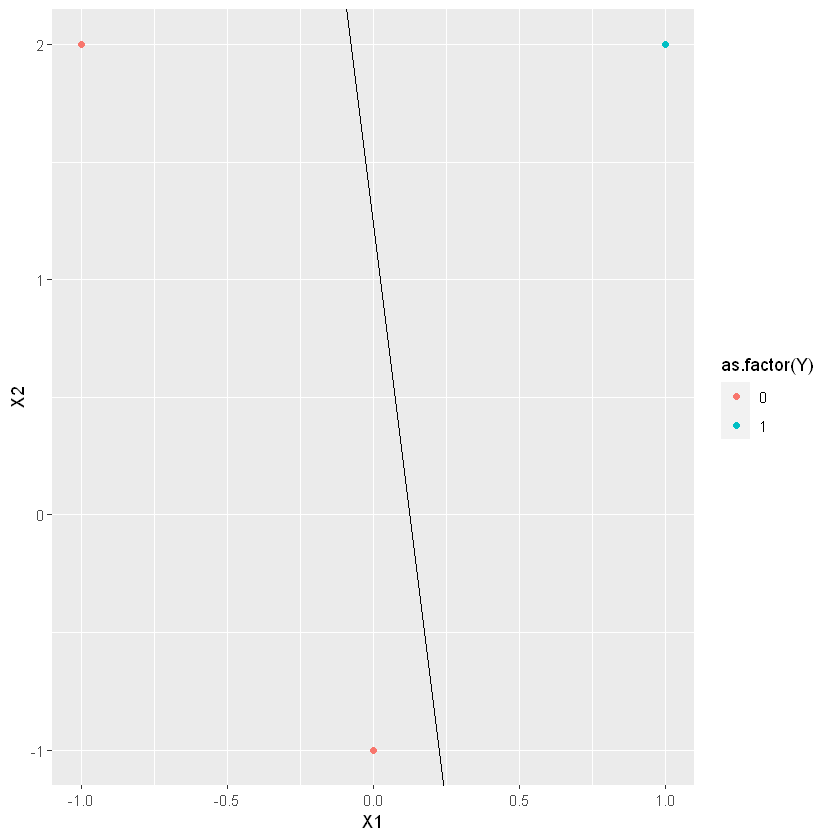

In [3]:
X<-cbind(c(1,-1,0),c(2,2,-1))
Y<-c(1,0,0)
datos<-data.frame(X,Y)
res<-train_perceptron(X,Y)
w<-res[1:2]
ggplot(datos,aes(x=X1, y=X2,color=as.factor(Y)))+
    geom_point()+geom_abline(intercept=(-(-0.25/w[2])),slope=(-(w[1]/w[2])))